# Step 1: Minimal Octo Inference Example

This notebook demonstrates how to load a pre-trained / finetuned Octo checkpoint, run inference on some images, and compare the outputs to the true actions.

First, let's start with a minimal example!

In [1]:
# # run this block if you're using Colab

# # Download repo
# !git clone https://github.com/octo-models/octo.git
# %cd octo
# # Install repo
# !pip3 install -e .
# !pip3 install -r requirements.txt
# !pip3 install --upgrade "jax[cuda11_pip]==0.4.20" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
# !pip install numpy==1.21.1 # to fix colab AttributeError: module 'numpy' has no attribute '_no_nep50_warning', if the error still shows reload

In [2]:
import os
from octo.utils.train_utils import Timer
os.environ['TOKENIZERS_PARALLELISM'] = 'false'

2024-07-11 11:14:49.004137: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 11:14:49.004170: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 11:14:49.004856: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-11 11:14:49.490283: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/smj/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as note

In [3]:
# 导入模块
import os
# 设置代理。这里 1080 既可以是 http 代理的端口，也可以是 socks5 代理的端口
proxy = 'http://127.0.0.1:7890'
os.environ['http_proxy'] = proxy
os.environ['HTTP_PROXY'] = proxy
os.environ['https_proxy'] = proxy
os.environ['HTTPS_PROXY'] = proxy
env = os.environ




In [4]:
from octo.model.octo_model import OctoModel

In [5]:
model_1cam_50eps_s2s=OctoModel.load_pretrained(checkpoint_path="/home/smj/hx/octo/scripts/finetune_ckpt/octo_finetune/experiment_20240711_100630")
model=model_1cam_50eps_s2s

/home/smj/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/smj/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [6]:
# model.dataset_statistics.keys(),model1.dataset_statistics.keys(),model2.dataset_statistics.keys()
model.dataset_statistics['action']


{'mask': array([ True,  True,  True,  True,  True,  True,  True, False]),
 'max': array([26.42212105, 10.93955612, 30.54519081, -0.38235867, 32.18457031,
        15.37662411, 32.18426132,  1.        ]),
 'mean': array([-12.0814724 ,  -7.7917223 , -23.17583275, -30.65646172,
         -3.84496737, -27.62633896,   8.96731186,   0.23935936]),
 'min': array([ -47.69000244,  -50.52242279, -101.16491699,  -89.73368835,
         -37.73592377,  -39.37519455,  -37.3858757 ,    0.        ]),
 'p01': array([-44.26382446, -33.62695312, -91.17623901, -74.8269043 ,
        -30.37003517, -39.04718781,  -5.86916637,   0.        ]),
 'p99': array([12.12007332,  9.45303535, 27.15726662, -0.40432236, 13.38720989,
         7.35527754, 28.64387703,  1.        ]),
 'std': array([15.84528732,  9.07757378, 33.59284973, 18.83248711,  7.30933428,
        15.24959183,  6.80162382,  0.42666548])}

(256, 256, 3)
(1, 1, 256, 256, 3)


/home/smj/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[[[-1.0366335e+01 -9.7700634e+00 -1.0483398e+00 -4.3584965e+01
   -4.5310016e+00 -3.6767113e+01  1.3894623e+01  2.5921425e-02]
  [-1.1994682e+01 -1.1811415e+01 -3.0539722e+00 -5.0357834e+01
   -4.1623368e+00 -3.3998871e+01  1.3798752e+01 -3.7966236e-02]
  [-1.2177602e+01 -9.8601427e+00 -9.9558830e-01 -4.2541325e+01
   -4.3153901e+00 -3.4815056e+01  1.4955959e+01  2.1358587e-01]
  [-1.1265642e+01 -1.0350985e+01 -5.2170773e+00 -4.9049385e+01
   -4.5601110e+00 -3.6160011e+01  1.6128397e+01  1.8398257e-01]
  [-1.2335340e+01 -1.0035454e+01  7.3650150e+00 -4.7320641e+01
   -3.7958190e+00 -3.4879051e+01  1.5173754e+01  5.0378643e-02]
  [-1.2126766e+01 -1.1243658e+01 -4.3238010e+00 -4.8644276e+01
   -4.1170220e+00 -3.5323864e+01  1.3807772e+01  9.7630039e-02]
  [-1.2713498e+01 -8.7747679e+00  5.2765236e+00 -4.7993198e+01
   -4.3155475e+00 -3.6659679e+01  1.3361513e+01  1.5112861e-01]
  [-1.3243828e+01 -1.0922507e+01  7.9367409e+00 -4.9529140e+01
   -4.2737579e+00 -3.7635735e+01  1.2123458e+01 

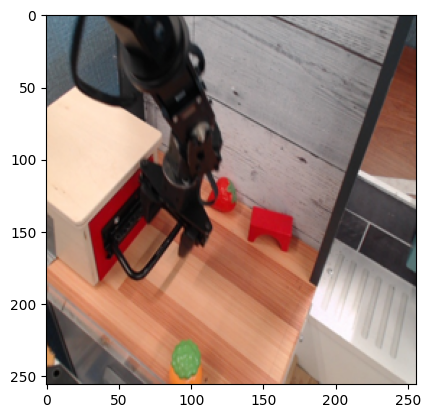

In [7]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np
# download one example BridgeV2 image
IMAGE_URL = "https://rail.eecs.berkeley.edu/datasets/bridge_release/raw/bridge_data_v2/datacol2_toykitchen7/drawer_pnp/01/2023-04-19_09-18-15/raw/traj_group0/traj0/images0/im_12.jpg"
img = np.array(Image.open(requests.get(IMAGE_URL, stream=True).raw).resize((256, 256)))
plt.imshow(img)
print(img.shape)

# create obs & task dict, run inference
import jax
# add batch + time horizon 1
img = img[np.newaxis,np.newaxis,...]
print(img.shape)


timer = Timer()
with timer("octo_inference"):
    observation = {"image_primary": img, "timestep_pad_mask": np.array([[True]])}
    task = model.create_tasks(texts=["pick up the forks"])
    action = model.sample_actions(
        observation, 
        task, 
        # unnormalization_statistics=model.dataset_statistics["bridge_dataset"]["action"], 
        unnormalization_statistics=model.dataset_statistics["action"], 
        rng=jax.random.PRNGKey(0)
    )
    print(action)   # [batch, action_chunk, action_dim]
# timer.tock("octo_inference")
average_times = timer.get_average_times()    
print(average_times)


# Step 2: Run Inference on Full Trajectories

That was easy! Now let's try to run inference across a whole trajectory and visualize the results!

In [8]:
# Install mediapy for visualization
# !pip install mediapy
# !pip install opencv-python

In [9]:
import cv2
import jax
import tensorflow_datasets as tfds
import tqdm
import mediapy
import numpy as np

## Load Model Checkpoint
First, we will load the pre-trained checkpoint using the `load_pretrained()` function. You can specify the path to a checkpoint directory or a HuggingFace path.

Below, we are loading directly from HuggingFace.


In [10]:
from octo.model.octo_model import OctoModel

# model = OctoModel.load_pretrained("hf://rail-berkeley/octo-small-1.5")
model=model

## Load Data
Next, we will load a trajectory from the Bridge dataset for testing the model. We will use the publicly available copy in the Open X-Embodiment dataset bucket.

In [11]:
# create RLDS dataset builder
builder = tfds.builder_from_directory(builder_dir='/home/smj/tensorflow_datasets/kuavo/1.0.0/')
ds = builder.as_dataset(split='train[:1]')

# sample episode + resize to 256x256 (default third-person cam resolution)
episode = next(iter(ds))
steps = list(episode['steps'])
images = [cv2.resize(np.array(step['observation']['image']), (256, 256)) for step in steps]
states = [cv2.resize(np.array(step['observation']['state']), (256, 256)) for step in steps]

# extract goal image & language instruction
goal_image = images[-1]
language_instruction = steps[0]['language_instruction'].numpy().decode()

# visualize episode
print(f'Instruction: {language_instruction}')
mediapy.show_video(images, fps=10)

Instruction: Grab the bottle and put it in the blue box


## Run Inference

Next, we will run inference over the images in the episode using the loaded model. 
Below we demonstrate setups for both goal-conditioned and language-conditioned training.
Note that we need to feed inputs of the correct temporal window size.

In [17]:
WINDOW_SIZE = 2

# create `task` dict
# task = model.create_tasks(goals={"image_primary": goal_image[None]})   # for goal-conditioned
task = model.create_tasks(texts=[language_instruction])                  # for language conditioned

In [ ]:
# run inference loop, this model only uses 3rd person image observations for bridge
# collect predicted and true actions
pred_actions, true_actions = [], []
for step in tqdm.trange(len(images) - (WINDOW_SIZE - 1)):
    input_images = np.stack(images[step:step+WINDOW_SIZE])[None]
    input_states = np.stack(states[step:step+WINDOW_SIZE])[None]
    observation = {
        'state':input_states,
        'image_primary': input_images,
        'timestep_pad_mask': np.full((1, input_images.shape[1]), True, dtype=bool)
    }
    
    # this returns *normalized* actions --> we need to unnormalize using the dataset statistics
    actions = model.sample_actions(
        observation, 
        task, 
        unnormalization_statistics=model.dataset_statistics["action"], 
        rng=jax.random.PRNGKey(0)
    )
    actions = actions[0] # remove batch dim
    print(actions)
    
    pred_actions.append(actions)
    final_window_step = step + WINDOW_SIZE - 1
    print(np.array(steps[final_window_step]["action"]).shape)
    true_actions.append(np.array(steps[final_window_step]["action"]))

## Visualize predictions and ground-truth actions

Finally, we will visualize the predicted actions in comparison to the groundtruth actions.

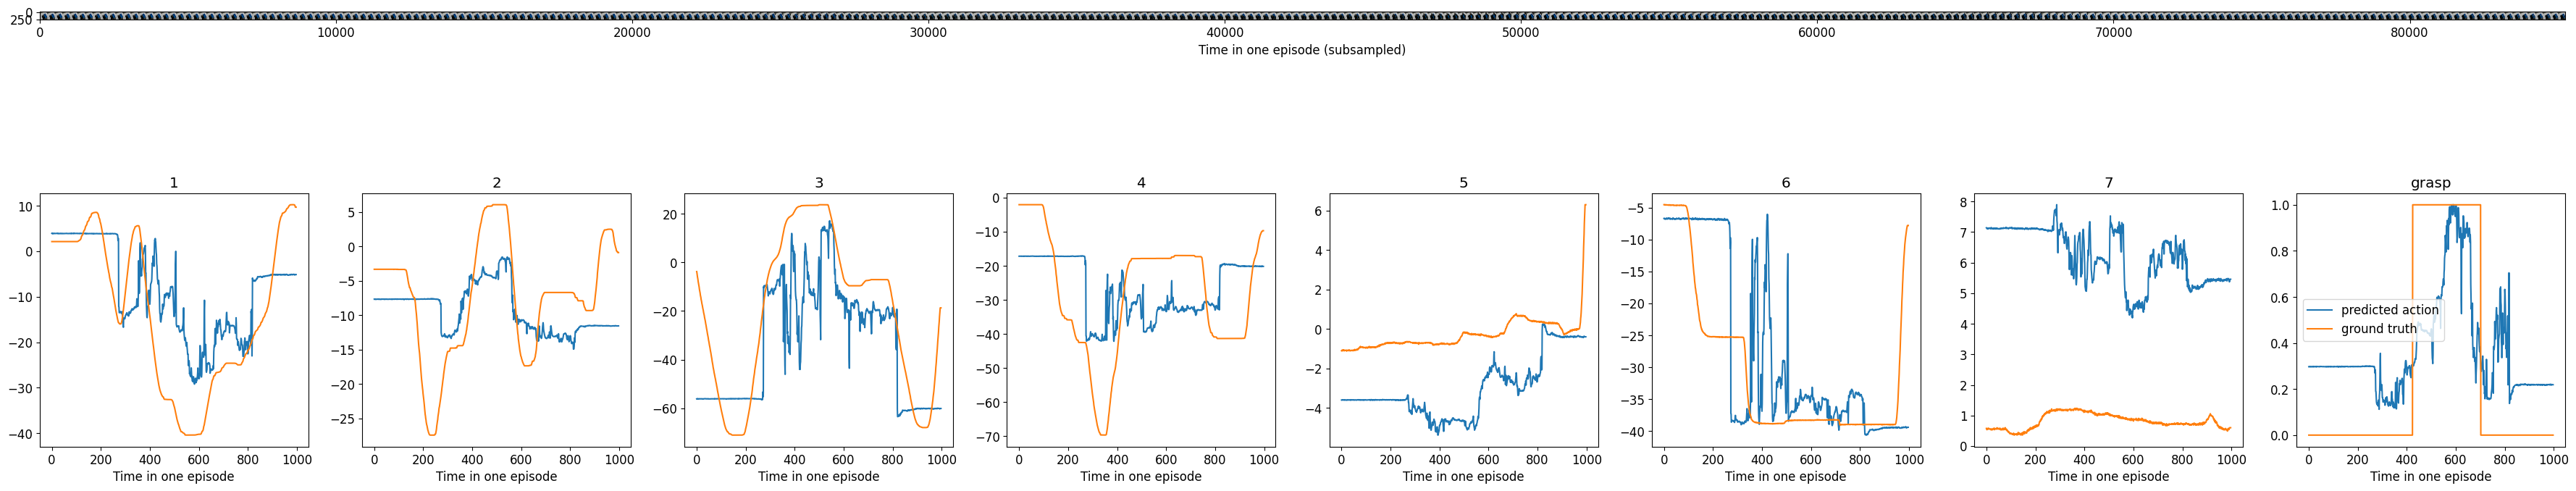

In [25]:
import matplotlib.pyplot as plt

ACTION_DIM_LABELS = ['1', '2', '3', '4', '5', '6', '7','grasp']

# build image strip to show above actions
img_strip = np.concatenate(np.array(images[::3]), axis=1)

# set up plt figure
figure_layout = [
    ['image'] * len(ACTION_DIM_LABELS),
    ACTION_DIM_LABELS
]
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplot_mosaic(figure_layout)
fig.set_size_inches([45, 10])

# plot actions
pred_actions = np.array(pred_actions).squeeze()
true_actions = np.array(true_actions).squeeze()
for action_dim, action_label in enumerate(ACTION_DIM_LABELS):
  # actions have batch, horizon, dim, in this example we just take the first action for simplicity
  axs[action_label].plot(pred_actions[:, 0, action_dim], label='predicted action')
  axs[action_label].plot(true_actions[:, action_dim], label='ground truth')
  axs[action_label].set_title(action_label)
  axs[action_label].set_xlabel('Time in one episode')

axs['image'].imshow(img_strip)
axs['image'].set_xlabel('Time in one episode (subsampled)')
plt.legend()